<div style="width: 100%; height: 50px; background-color: #add8e6"><h1 style="font-family: manrope; color: black; text-align: center; vertical-align: middle; line-height: 50px"><strong>Desafio Conta Azul</strong></h1></div> </br>

<div style="color: black; font-family: sans-serif">
Atualmente o modelo de negocio da Conta Azul depende, em parte, do que chamamos de receita recorrente, isto envolve todos os contratos mensais, trimestrais ou anuais que temos com pequenas e médias empresas que utilizam nosso sistema de ERP. Mesmo que o churn atualmente seja considerado baixo, ele ainda é responsável por uma perda considerável de receita anual.
</br>

Segue abaixo o fluxo seguido pelos clientes no momento do churn:

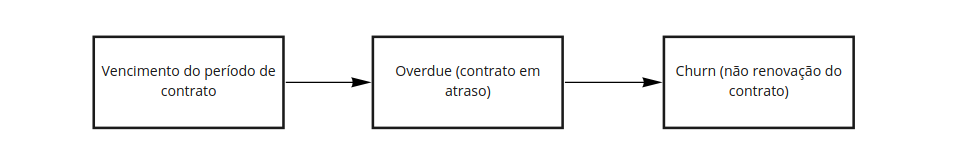

Portanto, muitas vezes quando o cliente chega neste estágio, é difícil reverter o cenário, o cliente já está desengajado. O ideal seria identificarmos o potencial churn com certa antecedência, até mesmo o entendimento a respeito de quais aspectos do comportamento ou das caractarísticas que influenciam o churn podem ser valiosas para o negócio.

<h5> <strong>Análise exploratória: </strong></h5>
Esta é a etapa onde você consegue compartilhar o seu raciocínio analítico conosco, portanto aproveite este etapa e não esqueça de deixar explícito:

-  Os insights e questionamentos que surgirem de sua análise exploratória.;
-  Para cada gráfico plotado, o que foi observado;
-  Como a análise exploratória te ajudou a escolher as variáveis para o seu modelo.?

<div style="color: black; font-family: sans-serif">
<h5> <strong>Modelagem e Machine learning:</strong></h5>

Nesta etapa você vai desenhar a modelagem e realizar a construção do seu modelo de machine learning que permita a criação de um produto que dê margem de ação preventiva e proativa para a área de negócios. É muito importante que você deixe bem estruturado e documentado sua linha de raciocínio, com anotações e descrições de cada passo deste processo.
   
       
<h5><strong>Escolha das métricas</strong></h5>

Justifique quais métricas você escolheu para avaliar sua solução. Nesta etapa do desafio é importante que você deixe claro qual a criticidade e conceitos que suportam a sua decisão.


<h5> <strong>Interpretação do output</strong></h5>

Nesta etapa você deve deixar claro como os outputs da sua solução podem ser interpretados. Aqui também é o espaço para você conseguir trazer insights interessantes que podem ser transmitidos para a área de negócios.

> **Output:** métricas dos modelos e arquivo _.pkl_ do melhor modelo.

<h5> <strong>Efeito</strong></h5>

Nesta etapa do desafio, considere que a sua solução virou um produto que pode ser utilizado pelos times de engajamento e retenção da Conta Azul. Este produto será uma lista de todos os clientes da Conta Azul com a propensão ao churn de cada um. Essa lista independe da data de vencimento do contrato, que é o principal momento onde ocorre o churn, e da probabilidade de chance de churn obtido com o algoritmo que você criou. Essa lista será compartilhada com a área de negócios, que a utilizará para desenhar e implementar ações visando diminuir o churn.

Dentro deste contexto, sua tarefa é desenhar dois experimentos que consigam trazer clareza a respeito do impacto da nossa solução. Considere que as tratativas para o churn podem ser, por exemplo, dar um desconto para o cliente, fornecer treinamento sobre a plataforma ou ter um acionamento da equipe de relacionamento com o cliente.

<h5> <strong>Primeiro experimento</strong></h5>

Para este estudo, considere que é possível controlar quais as tratativas serão utilizadas, quando e para quais clientes elas serão direcionadas.

<h5> <strong>Segundo experimento</strong></h5>

Para este estudo, considere que teremos três tipos de tratativas para o churn e a decisão de quando e para quais clientes utilizar cada uma é da área de negócio.

Além do cenário de cada experimento, considere que não existem limitações a respeito do que pode ser feito. Deixe registrado e documentado a decisão de cada passo adotado para cada experimento, pois é importante que a sua linha de raciocínio fique clara e que o estudo esteja documentado de forma replicável por outros colegas do seu time.

</div>
<br>


#### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from urllib.request import urlretrieve
import os
import shap
import joblib
import itertools
import pygwalker as pyg


# Modelo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import sensitivity_score, specificity_score
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import optuna
from sklearn.model_selection import cross_val_score
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from imblearn.metrics import sensitivity_score, specificity_score

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Configuração do Notebook
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


#### Funcoes 

In [2]:
def remove_accents(a):
    import unidecode
    return unidecode.unidecode(str(a).encode().decode('utf-8')).upper().strip()

def properties(data, col):
    print('min: ', data[col].min(),
          'max: ', data[col].max(),
          'mean: ', data[col].mean(),
          'median: ', data[col].median(),
          'mode: ', data[col].mode())

def check_cols(data, columns):
    df_check = pd.DataFrame(zip(data[columns].dtypes.index, 
                                data[columns].dtypes, 
                                data[columns].nunique(), 
                                data[columns].isna().sum(),
                                round(data[columns].isna().sum()/data.shape[0], 3)*100), 
                            columns=['Variável', 'Tipo', 'Qtde_unicos', 'Qtde_NaN', '%_NaN'])
    return df_check.sort_values('Qtde_NaN').reset_index().drop('index', axis=1)

def corr_report(data, columns, min_corr=0.1):
    '''
    Análise de Correlação entre as variáveis
    '''
    corr = data[columns].corr()
    high_corr = {'Coluna1':[], 'Coluna2':[], 'Correlação':[]}
    low_corr = {'Coluna1':[], 'Coluna2':[], 'Correlação':[]}
    skip_row = []
    for idx,col in enumerate(corr.columns):
        skip_row.append(idx)
        for row in range(len(corr.columns)):
            if row in skip_row:
                continue
            if abs(round(corr.iloc[idx, row],4)) > min_corr:
                high_corr['Coluna1'].append(col)
                high_corr['Coluna2'].append(corr.columns[row])
                high_corr['Correlação'].append(round(corr.iloc[idx, row],4))
            else:
                low_corr['Coluna1'].append(col)
                low_corr['Coluna2'].append(corr.columns[row])
                low_corr['Correlação'].append(round(corr.iloc[idx, row],4))
    return low_corr, high_corr

#### 1. Aquisicão dos dados

In [4]:
df = pd.read_excel("../Dados/Originais/customer_churn_data.xlsx")
df.sample(7)

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,Frequência de utilização de feature do sistema: Emissão de nota fiscal,Frequência de utilização de feature do sistema: Integração bancária,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
1922,1923.0,Pequena empresa,2017.0,Sim,6 ou mais funcionários,25.0,Sim,Sim,automática,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Uso frequente,Pouco uso,Mês-a-mês,0.0,No,Boleto - pagamento único,60.35,1404.65,Não
2442,2443.0,Pequena empresa,2002.0,Não,até 5 funcionários,7.0,Sim,Sim,manual,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Uso frequente,Pouco uso,Mês-a-mês,1.0,Yes,Boleto - pagamento único,84.80,546.95,Sim
3217,3218.0,Micro empresa,2016.0,Não,até 5 funcionários,2.0,Sim,Não,não faz,Nunca utilizou,Nunca utilizou,Nunca utilizou,Nunca utilizou,Nunca utilizou,Nunca utilizou,Mês-a-mês,1.0,Yes,Boleto - mês a mês,20.45,42.45,Não
5665,5666.0,Pequena empresa,2021.0,Não,até 5 funcionários,34.0,Não,NaN,automática,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1.0,Yes,Cartão de crédito - pagamento único,25.05,852.70,Não
161,162.0,Micro empresa,2018.0,Sim,até 5 funcionários,20.0,Sim,Sim,manual,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,0.0,No,Boleto - pagamento único,82.40,1592.35,Sim
756,757.0,Pequena empresa,2021.0,Não,até 5 funcionários,66.0,Sim,Não,não faz,Nunca utilizou,Nunca utilizou,Nunca utilizou,Nunca utilizou,Nunca utilizou,Nunca utilizou,Anual,0.0,No,Cartão de crédito - pagamento único,19.70,1253.80,Não
5628,5629.0,Micro empresa,2018.0,Não,até 5 funcionários,13.0,Sim,Sim,manual,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Uso frequente,Pouco uso,Mês-a-mês,1.0,Yes,Boleto - pagamento único,96.65,1244.50,Sim


In [6]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [5]:
check_cols(df, df.columns)

,Variável,Tipo,Qtde_unicos,Qtde_NaN,%_NaN
0,ID,float64,7043,0,0.0
1,Receita mensal,float64,1585,0,0.0
2,Tipo de pagamento,object,4,0,0.0
3,Emite boletos.1,object,2,0,0.0
4,Emite boletos,float64,2,0,0.0
5,Contrato,object,3,0,0.0
6,Frequência de utilização de feature do sistema...,object,3,0,0.0
7,Frequência de utilização de feature do sistema...,object,3,0,0.0
8,Frequência de utilização de feature do sistema...,object,3,0,0.0
9,Frequência de utilização de feature do sistema...,object,3,0,0.0


In [108]:
# dropando colunas repetidas, que contém a mesma informacao.
df = df.drop('Emite boletos.1', axis=1)

In [109]:
cols_obj = [x for x in df.select_dtypes(include=['object']).columns]

cols_num = [x for x in df.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64']).columns]

print(f'Total colunas tipo objeto: {len(cols_obj)}\nTotal de colunas tipo numerica: {len(cols_num)}')

Total colunas tipo objeto: 17
Total de colunas tipo numerica: 4


Trata-se de um df com 17 (após exclusao) colunas tipo obj, 4 numericas e duas colunas com algum numero de linhas sem preenchimento. O valor é bem pequeno, entao a tratativa é preencher com "sem informacao" para facilitar na hora de passar o encoder.
Já foi retirada a coluna de emissao de boletos.1 por se tratar de uma coluna binaria que relfete sua antecessora, Emissao de boletos, que carrega a mesma info mas já numeral.

#### 2. Tratamento e analise dos dados

2.2 Aalise exploratoria/Tratamento básicos dos dados:

In [110]:
#transformando colunas em binario - 1 para Sim, 0 para Não
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Sim' else 0)
df['PossuiContador'] = df['PossuiContador'].apply(lambda x: 1 if x == 'Sim' else 0)

In [111]:
# transformando valores em float para calculo
df['Receita total'] = df['Receita total'].str.replace('[^0-9,]+', '', regex=True)
df['Receita total'] = df['Receita total'].str.replace(',', '.').astype(float)
df['Receita mensal'] = df['Receita mensal'].str.replace('[^0-9,]+', '', regex=True)
df['Receita mensal'] = df['Receita mensal'].str.replace(',', '.').astype(float)

In [112]:
# Testando a provável presença de valores que representam anomalias e/ou outliers

num_cols = ['Receita mensal', 'Receita total']

for var in num_cols:
    print(f'valores para a variavel: {var}')
    properties(df, var) 
    print('------------------------------------------------------------------------------------')

valores para a variavel: Receita mensal
min:  18.25 max:  118.75 mean:  64.76169246059918 median:  70.35 mode:  0    20.05
Name: Receita mensal, dtype: float64
------------------------------------------------------------------------------------
valores para a variavel: Receita total
min:  18.8 max:  8684.8 mean:  2283.3004408418656 median:  1397.475 mode:  0    20.2
Name: Receita total, dtype: float64
------------------------------------------------------------------------------------


<AxesSubplot: xlabel='Receita total', ylabel='Density'>

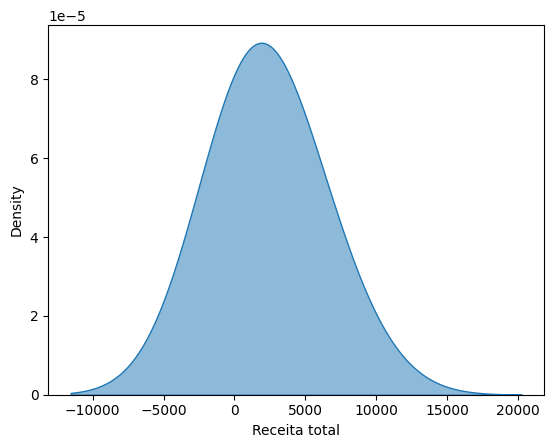

In [113]:
# distribuição da Receita Total
sns.kdeplot(data = df,
            x = "Receita total",            
            bw_adjust = 10,
            fill = True,
            alpha = .5)

<AxesSubplot: xlabel='Receita mensal', ylabel='Density'>

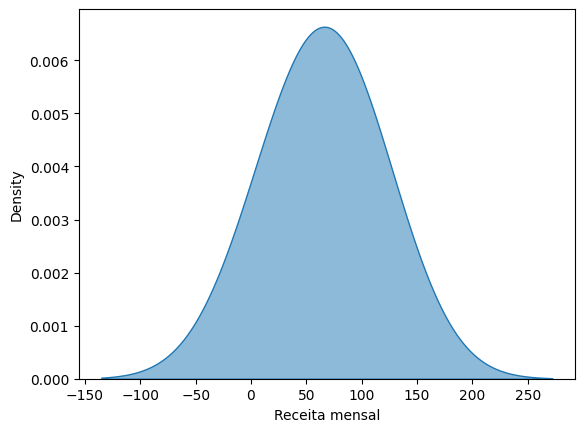

In [114]:
# Distribuição da Receita Mensal
sns.kdeplot(data = df,
            x = "Receita mensal",            
            bw_adjust = 10,
            fill = True,
            alpha = .5)

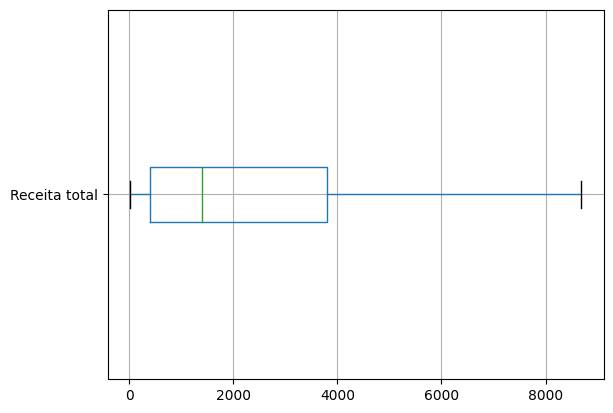

In [115]:
boxplot_total = df.boxplot(column=['Receita total'], vert=False)  

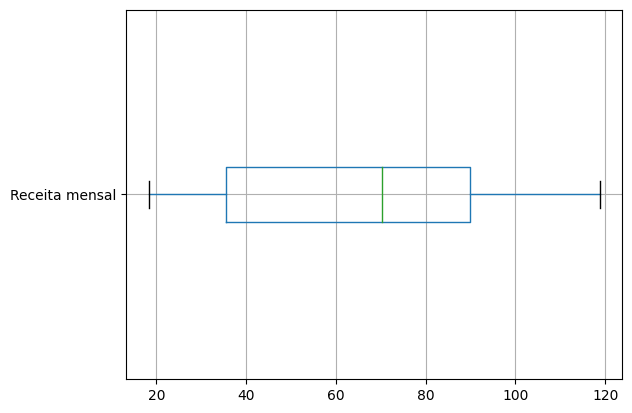

In [116]:
boxplot_mensal = df.boxplot(column=['Receita mensal'], vert=False)  

A coluna de receita total apresenta uma dispersao maior em relacao a receita mensal dos clientes. Temos nessa coluna, uma mediana distante da média, o que representa bem essa dispersao. Pelos boxplots acima, lê-se que a maior concentracao de valores está ali entre aproximadamente 500 reais e 4k e da receita total e  uma concentracao maior entre 30 reais e 90 reais. Ambas apresentam uma distribuição normal ou muito proxima da normalidade.

In [117]:
# Escolha as colunas que deseja incluir na análise de correlação
columns_to_analyze = ['Fundação da empresa',
       'Meses de permanência ',
       'PossuiContador',
       'Emite boletos', 'Receita mensal',
       'Receita total', 'Churn']

# Defina o valor mínimo de correlação
min_corr_value = 0.2

# Aplique a função corr_report
low_corr, high_corr = corr_report(df, columns_to_analyze, min_corr_value)

# Imprima os resultados
print("Pares de colunas com baixa correlação:")
print(pd.DataFrame(low_corr))

print("\nPares de colunas com alta correlação:")
print(pd.DataFrame(high_corr))

Pares de colunas com baixa correlação:
                  Coluna1                Coluna2  Correlação
0     Fundação da empresa  Meses de permanência      -0.0019
1     Fundação da empresa         PossuiContador     -0.1134
2     Fundação da empresa          Emite boletos     -0.1285
3     Fundação da empresa         Receita mensal     -0.1891
4     Fundação da empresa          Receita total     -0.0774
5     Fundação da empresa                  Churn     -0.1419
6   Meses de permanência           Emite boletos      0.0062
7          PossuiContador          Emite boletos      0.1635
8          PossuiContador                  Churn      0.0401
9           Emite boletos          Receita total      0.1578
10          Emite boletos                  Churn      0.1918
11         Receita mensal                  Churn      0.1934
12          Receita total                  Churn     -0.1995

Pares de colunas com alta correlação:
                 Coluna1         Coluna2  Correlação
0  Meses de per

Entendendo um pouco das colunas mais correlacionadas:</br>
</br>
<strong>Meses de Permanência vs. Churn (-0.3522)</strong>: A correlação entre "Meses de permanência" e "Churn" é -0.3522, o que indica uma correlação negativa. Isso significa que, à medida que a duração da permanência dos clientes aumenta (ou seja, mais meses de permanência), a probabilidade de eles cancelarem (Churn) tende a diminuir. Essa correlação negativa sugere que clientes que permanecem mais tempo são menos propensos a cancelar.
</br>
<strong>"Meses de permanência" e "Receita total"</strong> têm uma correlação alta de 0.8259. Isso indica que há uma forte relação positiva entre o número de meses que os clientes permanecem e a receita total gerada por esses clientes. Ou seja, à medida que a duração da permanência aumenta, a receita total também tende a aumentar. Esse tipo de correlação pode gerar insumo de campanhas de engajamento do setor de marketing, demonstrando, talvez, alguns clientes com essas caracteristicas como benchmark para os que caírem na maior chance de churn. </br>
<strong>"PossuiContador" e "Receita mensal"</strong> têm uma correlação relativamente alta de 0.4904. Isso sugere que a presença de um contador está positivamente relacionada com a receita mensal. Clientes que possuem um contador tendem a gerar uma receita mensal mais alta, o que faz sentido, já que a partir de certo valor de receita anual o empreendedor muda de status (MEI, Simples Nacional, etc) e lidar com essas burocracias demanda tempo e conhecimento do sistema. Apesar de não ser obrigatório, é uma boa prática. (fonte: https://www.contabilizei.com.br/contabilizei-responde/quem-abre-uma-empresa-e-obrigado-a-ter-um-contador/#:~:text=Somente%20o%20MEI%20(Microempreendedor%20Individual,de%20contabilidade%20interno%20ou%20externo.)</br>
<strong>"Receita mensal" e "Receita total"</strong> têm uma correlação alta de 0.6511 e esperada, visto que uma serve de insumo para o calculo da outra.

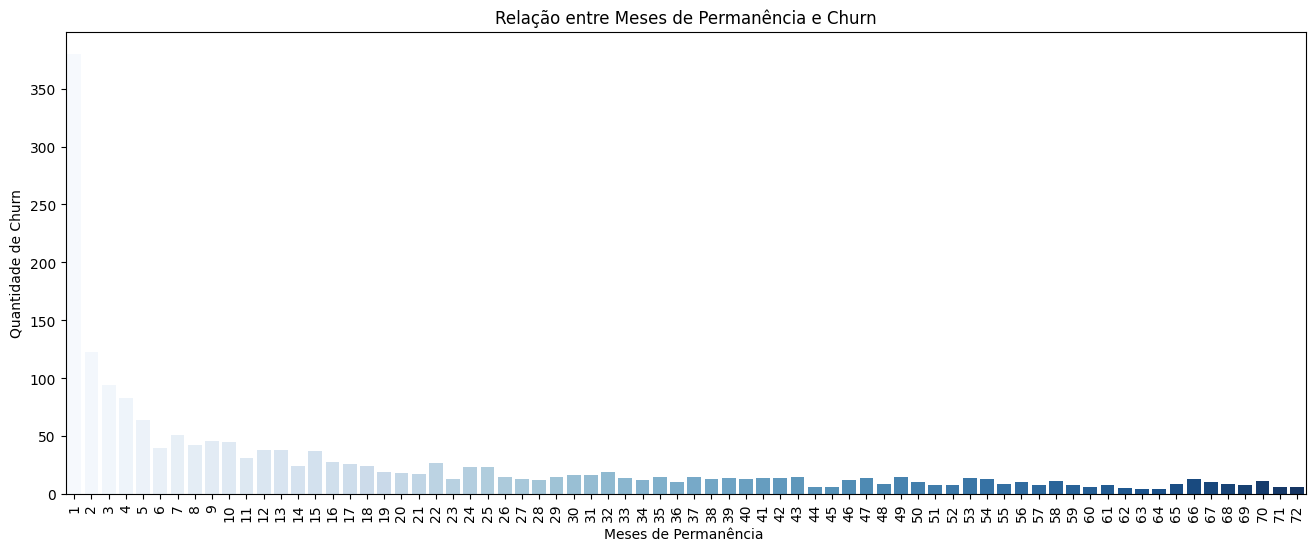

In [118]:
# Identificando evolução dos cancelamentos

churn_data = df[df['Churn'] == 1]

# Contar o número de ocorrências de churn para cada mês de permanência
churn_count_by_month = churn_data['Meses de permanência '].value_counts().reset_index()
churn_count_by_month.columns = ['Meses de permanência ', 'Quantidade de Churn']

plt.figure(figsize=[16, 6])
sns.barplot(
    x='Meses de permanência ',
    y='Quantidade de Churn',
    data=churn_count_by_month,
    palette='Blues'  # Escolha uma paleta de cores
)
plt.xlabel('Meses de Permanência ')
plt.ylabel('Quantidade de Churn')
plt.title('Relação entre Meses de Permanência e Churn')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

É evidente que a relacao entre os meses de permanencia da empresa com a conta azul está diretamente ligada aos meses de permanencia. Como visto antes, quanto mais o cliente fica, menor a chance dele pedir o distrato. Demandaria um estudo mais profundo das causas sobre os primeiros 12 meses de vida desse contrato. A área de CS deve ter mapeada a razão desses distratos ao longo desses meses.  

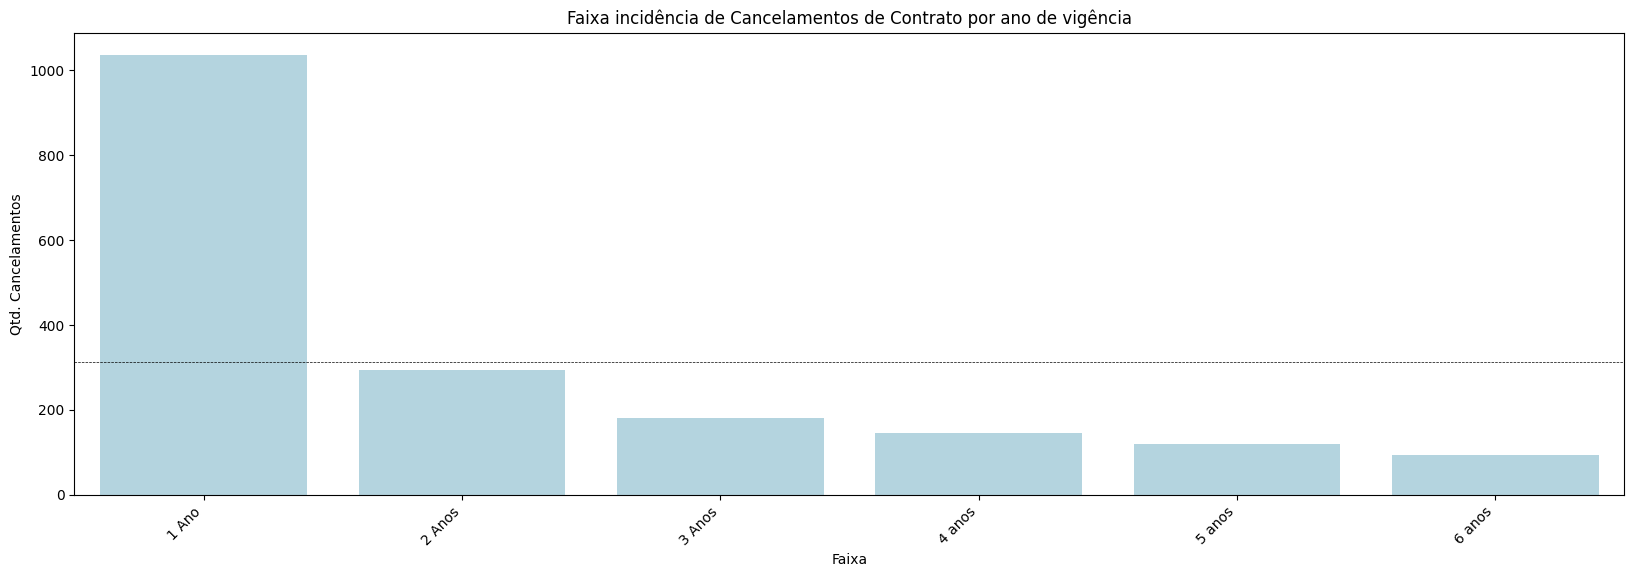

In [119]:
# Trabalhando com janelas de meses com maior incidencia de cancelamentos

df_plot = df[df['Churn']==1]
df_plot['faixa_dias_cancelamento'] = np.select([
    df_plot['Meses de permanência '].between(0,12), # Contratos de 1 ano
    df_plot['Meses de permanência '].between(13,24), # Contratos de 2 anos
    df_plot['Meses de permanência '].between(25, 36), # Contratos de 3 anos
    df_plot['Meses de permanência '].between(37,48), # Contratos de 4 anos
    df_plot['Meses de permanência '].between(49,60), # Contratos de 5 anos
    df_plot['Meses de permanência '].between(61,72)], # Contratos de 6 anos
    ['1 Ano', '2 Anos', '3 Anos', '4 anos', '5 anos', '6 anos'])
df_plot = pd.DataFrame(df_plot.groupby(['faixa_dias_cancelamento'])['Churn'].count()).reset_index()
df_plot.sort_values(by='Churn', ascending=False, inplace=True)


plt.figure(figsize=[20,6])
sns.barplot(
    x='faixa_dias_cancelamento',
    y='Churn',
    data=df_plot,
    color='#ADD8E6')
plt.axhline(np.mean(df_plot['Churn']), c='black', lw=.5, ls='--', label='Média de Cancelamentos')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Faixa')
plt.ylabel('Qtd. Cancelamentos')
plt.title('Faixa incidência de Cancelamentos de Contrato por ano de vigência')
plt.show()

del df_plot

Uma atenção maior aos clientes com menos de um ano na base traria um bom retorno de investimento. Apenas no primeiro ano temos aproximadamente o triplo de churn do que no segundo ano de contrato. 

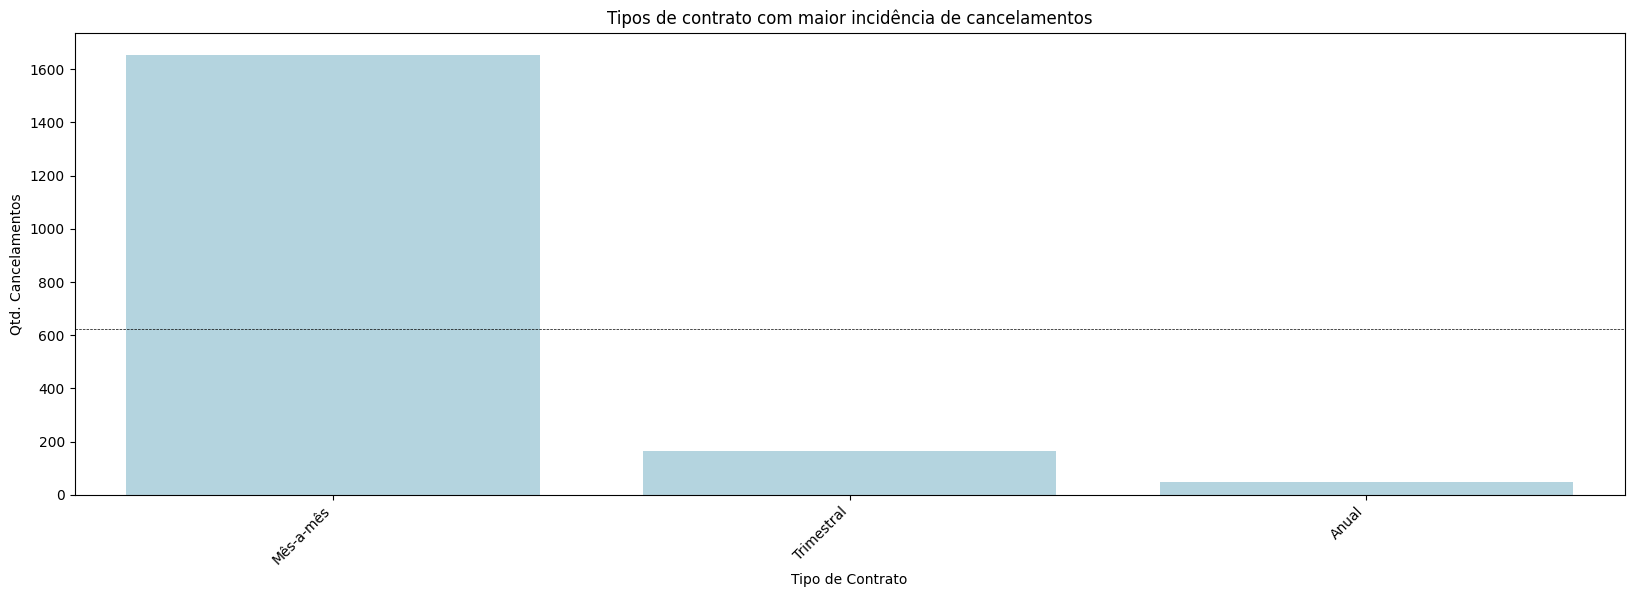

In [120]:
# Identificando tipos de contrato com maior incidencia de cancelamentos

df_plot = pd.DataFrame(df[df['Churn']==1].groupby(['Contrato'])['Churn'].count()).reset_index()
df_plot.sort_values(by='Churn', ascending=False, inplace=True)
df_plot = df_plot.head(10)

plt.figure(figsize=[20,6])
sns.barplot(
    x='Contrato',
    y='Churn',
    data=df_plot,
    color='#ADD8E6')
plt.axhline(np.mean(df_plot['Churn']), c='black', lw=.5, ls='--', label='Média de Cancelamentos')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Qtd. Cancelamentos')
plt.title('Tipos de contrato com maior incidência de cancelamentos')
plt.show()

del df_plot

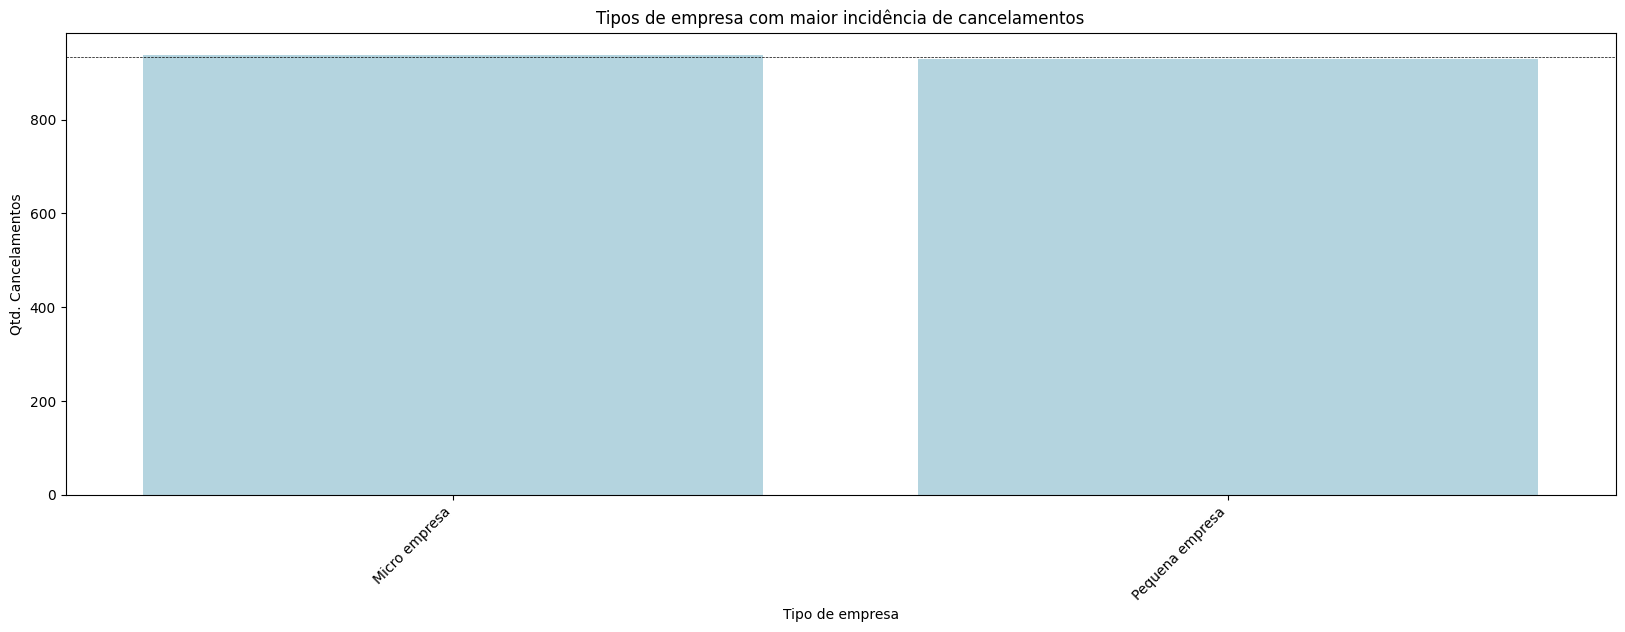

In [121]:
# Identificando tipos de empresa com maior incidencia de cancelamentos

df_plot = pd.DataFrame(df[df['Churn']==1].groupby(['Tipo de empresa'])['Churn'].count()).reset_index()
df_plot.sort_values(by='Churn', ascending=False, inplace=True)
df_plot = df_plot.head(10)

plt.figure(figsize=[20,6])
sns.barplot(
    x='Tipo de empresa',
    y='Churn',
    data=df_plot,
    color='#ADD8E6')
plt.axhline(np.mean(df_plot['Churn']), c='black', lw=.5, ls='--', label='Média de Cancelamentos')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de empresa')
plt.ylabel('Qtd. Cancelamentos')
plt.title('Tipos de empresa com maior incidência de cancelamentos')
plt.show()

del df_plot

Para finalizar uma breve análise do comportamento dos clientes que solicitam distrato, temos um perfil de ação: clientes que se utilizam do tipo de contrato mes a mes costumam solicitar o distrato em até 1 ano de uso da ferramenta. Um plano de ação com esses clientes desse perfil é necessário para evitar esse comportamento.

#### 3. Criação e avaliação do modelo

In [122]:
#funcs

def predicoes_binarias(df_input, cols_keep, cols_model, path_model='../Modelos/xgb_otimizado.pkl'):
    # Carrega o modelo treinado
    model = joblib.load(path_model)
    
    # Inicializa o df com as predições
    df = pd.DataFrame()
    for col in cols_keep:
        df[col] = df_input[col].values
    
    # norm
    input_model = normalizing(df_input, cols_model)
    
    prob_class = model.predict_proba(input_model)[:, 1]  # Probabilidade da classe positiva
    
    df['PROB_CLASSE_POSITIVA'] = prob_class
    df['CLASSE_PREDITA'] = (prob_class > 0.5).astype(int)  # Classifica como 1 se a probabilidade da classe positiva (que eu quero prever) for maior que 0.5, senão como 0
    # Adicione as colunas de cols_model ao DataFrame de predição
    for col in cols_model:
        df[col] = df_input[col].values
        
        
    return df

def get_cols(df, target='cancellation', cols2exc=[]):
    '''
    Separa as features para normalização, enconding e target
    '''
    # features que passarão pelo enconding - objetos 
    cols2enc = [target] + [x for x in df.select_dtypes(include=['object']).columns if x not in cols2exc and x not in [target]]
    # features que serão normalizadas
    cols2norm = [x for x in df.select_dtypes(include=['int64', 'float64']).columns if x not in cols2exc and x not in cols2enc] 
        
    return cols2enc, cols2norm 

def normalizing(df, target='cancellation', cols2exc=[]):
    '''
    Aplica o enconding e normalização aos dados
    '''   
    # separate cols
    cols2enc, cols2norm = get_cols(df, target, cols2exc)
    #print(cols2enc, cols2norm)
    df_norm = pd.DataFrame()
    
    # encoding 
    enc_mapping = list()
    encoder = LabelEncoder()
    for col in cols2enc:
        encoded = encoder.fit_transform(df[col])#.astype(str))
        df_norm[col] = encoded
        mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        enc_mapping.append([col, mapping])
        
    # normalizing
    scaler = MinMaxScaler()
    for col in cols2norm:
        encoded = scaler.fit_transform(df[col].astype(float).values.reshape(-1, 1))
        df_norm[col] = encoded
        
    return df_norm, enc_mapping

def get_model(X, y, nsplit=3, min_features=10, njobs=-1):
    '''
    Retorna o RFE + CV 
    '''
    rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
    kfold = StratifiedKFold(n_splits=nsplit, shuffle=True) 
    cv = kfold.split(X, y)
    return RFECV(estimator=rfc, step=nsplit, min_features_to_select=min_features, cv=cv, n_jobs=njobs)

def get_features_info(rfecv, X, df, style=None):
    '''
    Retorna a análise das features selecionadas pelo RFECV + dataframe com essas features
    '''
    print('Número ótimo de variáveis selecionadas pelo RFE: {}'.format(rfecv.n_features_))
    
    if not style:
        style = {'font-family': 'manrope', 
                 'color-header': 'white',
                 'background-header': '#000000',
                 'header-fsize': '16px',
                 'background-even': '#7a7423',
                 'background-odd': '#a7e82b',
                 'rows-fsize' : '14px',
                 'figsize': (12,12),
                 'cmap': 'Greens',
                 'color': '#c04cfd'}
        
    # Visualizando as importancia das variáveis selecionadas
    X2 = X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1)
    dset = pd.DataFrame()
    dset['attr'] = X2.columns
    dset['importance'] = rfecv.estimator_.feature_importances_
    dset = dset.sort_values(by='importance', ascending=True)

    fig, axs = plt.subplots(2,1, figsize=style['figsize'], gridspec_kw={'height_ratios': [1, 3]})
    fig.suptitle('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold')
    axs[0].plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], 
                color=style['color'], linewidth=3)
    axs[0].set_xlabel('Number of features selected', fontsize=14, labelpad=20)
    axs[0].set_ylabel('% Correct Classification', fontsize=14, labelpad=20)
    axs[1].barh(y=dset['attr'], width=dset['importance'], color=style['color'])
    axs[1].set_xlabel('Importancia', fontsize=14, labelpad=20)
    
    # Tabela com as variáveis e seu percentual de importancia
    df_import = pd.DataFrame(zip(dset.attr, [f'{x*100:.2f}%' for x in dset.importance.sort_values(ascending=True)]), columns=['Variável', 'Importancia'])
    print(df_import)

    # Variáveis selecionadas pelo RFE/RF
    cols_rfe = dset.attr
    # Dataframe com as features selecionadas 
    return df_import, df[cols_rfe.tolist()]

def work_model(model=None, ftype='pkl', path2save='../../models/', outname='model'):

    '''
    Salva ou carrega um modelo

    inputs:
    model = modelo a ser salvo
    ftype = tipo do arquivo, pkl ou joblib
    path2save = path para salvar/carregar o modelo: ex.: '../../models'
    outname = nome para o output - nome do modelo 

    output:
    retorna = arquivo salvo ou modelo carregado

    '''

    import os
    import joblib
    import pickle

    outname = os.path.join(path2save, outname)
    outfile = f"{outname}.{ftype}"

    if ftype == 'pkl':
        if model: # save
            pickle.dump(model, open(outfile, 'wb'))
            print(f'Model saved as {outfile}')  

        else: # load
            return pickle.load(open(f'{outfile}', 'rb'))

    else:
        if model:
            joblib.dump(model, outfile)
            print(f'Model saved as {outfile}')  

        else:
            return joblib.load(f'{outfile}')

def fit_model(X, y, model=LogisticRegression()):
    '''
    Fit modelos aos dados
    '''
    model.fit(X, y)
    return model

def model_metrics(X_test, y_test, model,  average_type='macro'):
    y = y_test
    y_pred = xgb.predict(X_test)

    model_metrics_dict = {'Acurácia': accuracy_score(y, y_pred),
                          'Precisão': precision_score(y, y_pred, average=average_type),
                          'Recall': recall_score(y, y_pred, average=average_type),
                              'F1-Score': f1_score(y, y_pred, average=average_type)}


    return model_metrics_dict

In [123]:
# para seguir com o modelo, equalizo a base preenchendo os nan da coluna de receita com 0
df['Receita total'].fillna(0, inplace=True)

In [124]:
cols_exc = ['ID'] #col;una de identificacao de sistema

df_norm, enc_mapping = normalizing(df, target='Churn', cols2exc=cols_exc)

df_norm.to_csv('../../Dados/Intermediario/df_norm_azul.csv', sep=';', index=False)

In [125]:
# Inserindo variáveis NOISE e separando features do target (tecnica RANDOM BAR)

cols2exc=[]
target = ['Churn']

# Insere noise
df_norm['NOISE1'] = np.random.normal(0, 1, df_norm.shape[0])
df_norm['NOISE2'] = np.random.rand(df_norm.shape[0])

X = df_norm.drop(cols2exc+target, axis=1) # Features
y = df_norm[target[0]].values # Target

Testando o algoritmo RFE para seleção das melhores features para o Modelo

In [126]:
# Estancia o modelo

rfecv = get_model(X, y, nsplit=3, min_features = 5)

# Fit do modelo

%time rfecv.fit(X,y)

CPU times: total: 1.27 s
Wall time: 5.93 s


RFECV(cv=<generator object _BaseKFold.split at 0x000002A841FD9A80>,
      estimator=RandomForestClassifier(class_weight='balanced',
                                       random_state=42),
      min_features_to_select=5, n_jobs=-1, step=3)

Número ótimo de variáveis selecionadas pelo RFE: 21
                                             Variável Importancia
0                        Utiliza serviços financeiros       0.42%
1                                      PossuiContador       1.22%
2                                        Funcionários       1.35%
3                             Possui mais de um sócio       1.44%
4                                     Tipo de empresa       1.60%
5                                       Emite boletos       1.73%
6   Frequência de utilização de feature do sistema...       1.84%
7   Frequência de utilização de feature do sistema...       1.95%
8   Frequência de utilização de feature do sistema...       2.13%
9   Frequência de utilização de feature do sistema...       2.73%
10  Frequência de utilização de feature do sistema...       3.38%
11                           Faz conciliação bancária       3.62%
12                                  Tipo de pagamento       3.67%
13  Frequência de utiliz

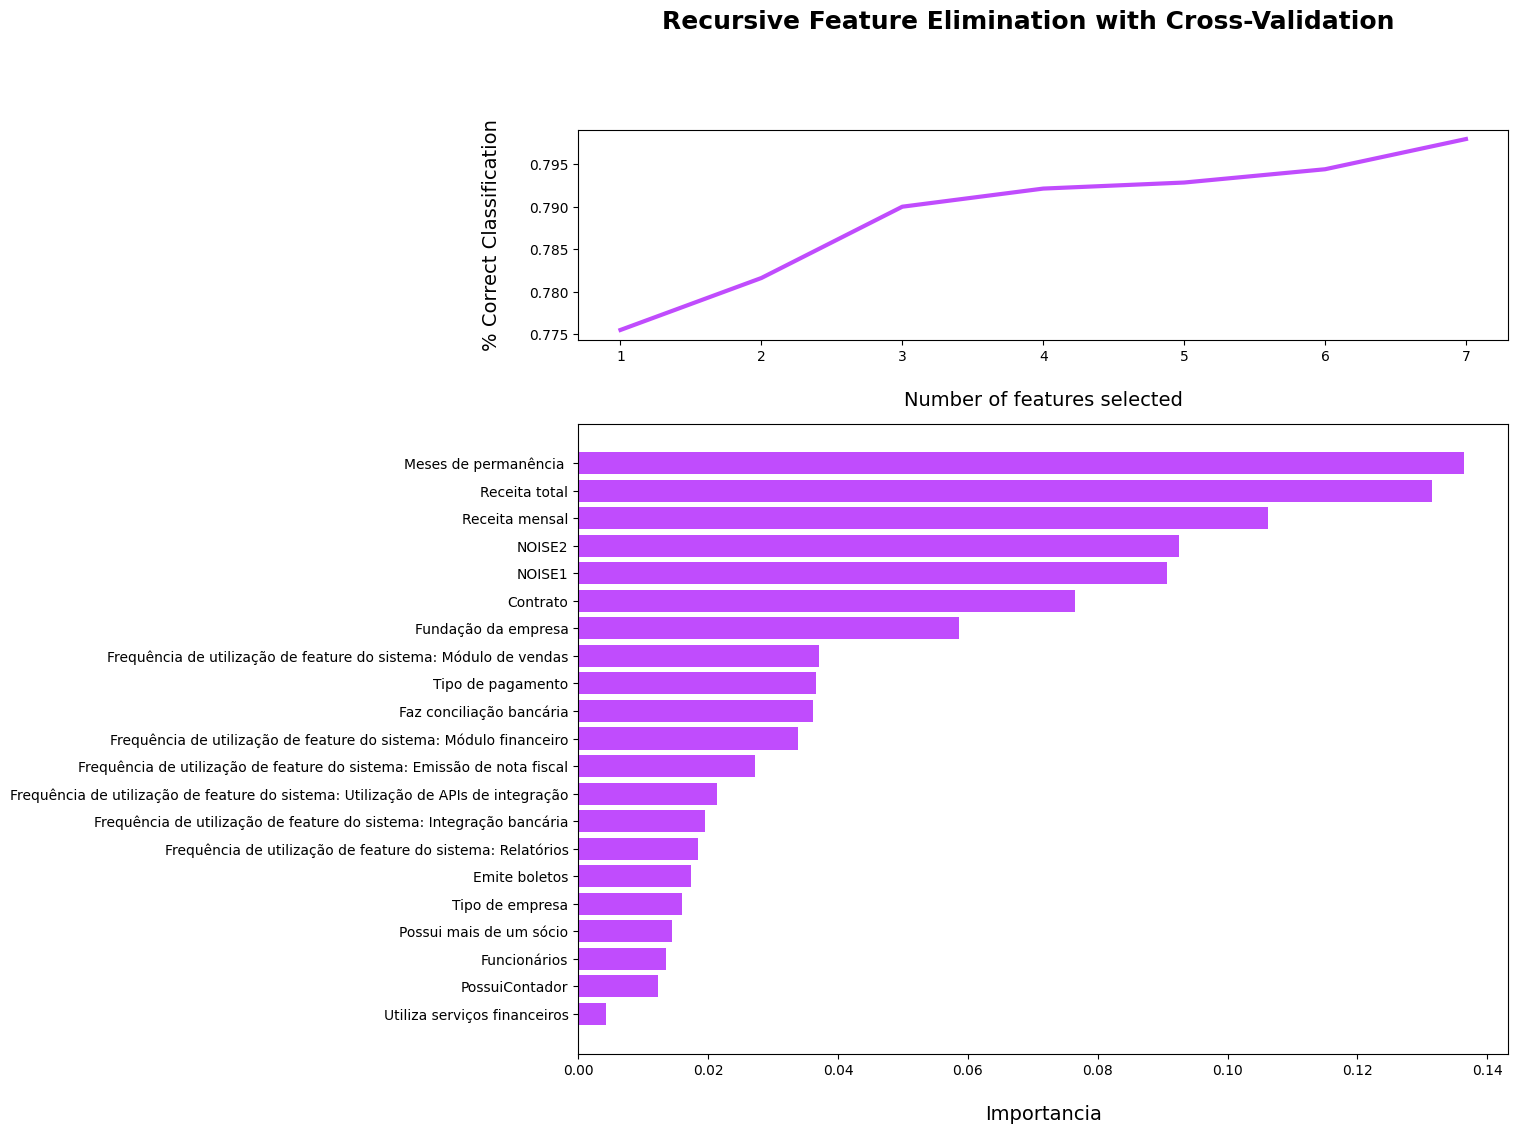

In [127]:
df_imp, df_rfe = get_features_info(rfecv, X, df_norm)

Utilizando o CatBoost Classifier para seleção das melhores features para o modelo. 

In [128]:
# Catboost classifier
from catboost import CatBoostClassifier, Pool
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=100,
    posterior_sampling=True,
    loss_function="Logloss",
    eval_metric="AUC",
    metric_period=100,
)

# Selecione as features
selected_features = model.select_features(
    X=X,
    y=y,
    features_for_select=X.columns,
    num_features_to_select=15, 
    algorithm="RecursiveByShapValues",
    steps=5,
    train_final_model=False,
    verbose=False,
)

Step #1 out of 5
Feature #7 eliminated
Step #2 out of 5
Feature #3 eliminated
Feature #2 eliminated
Step #3 out of 5
Feature #1 eliminated
Step #4 out of 5
Feature #6 eliminated
Step #5 out of 5
Feature #0 eliminated


In [129]:
index = list(selected_features.get('selected_features'))
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=100,
    posterior_sampling=True,
    loss_function="Logloss",
    eval_metric="AUC",
    metric_period=100,
)

index_att = list(np.sort((index)))
index_att



[4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [130]:
# fitando o modelo com as variaveis selecionadas pelo CBC
model.fit(X.iloc[:, index_att],y, verbose = False)

In [131]:
feature_importance = model.get_feature_importance(data=Pool(X.iloc[:, index_att], label=y), type="LossFunctionChange")
feature_importance = feature_importance.reshape(-1,1)
feature_importance = feature_importance[feature_importance > 0]* 100 
feature_importance


array([0.5166506 , 0.38794861, 0.43491903, 0.41690494, 0.45181483,
       1.67970795, 0.84217341, 1.51828513, 4.08042124, 0.37672561,
       0.49515327, 3.31213481, 3.55775526, 3.05604265, 3.0002626 ])

In [132]:
feature_importance_df = pd.DataFrame({
    'Feature': X.iloc[:,index_att].columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'NOISE1']
feature_importance_df

,Feature,Importance
9,PossuiContador,0.376726
1,Frequência de utilização de feature do sistema...,0.387949
3,Frequência de utilização de feature do sistema...,0.416905
2,Frequência de utilização de feature do sistema...,0.434919
4,Frequência de utilização de feature do sistema...,0.451815
10,Emite boletos,0.495153
0,Faz conciliação bancária,0.516651
6,Tipo de pagamento,0.842173
7,Fundação da empresa,1.518285
5,Contrato,1.679708


In [133]:
feature_clean = feature_importance_df['Feature']
feature_clean_list = feature_clean.tolist()

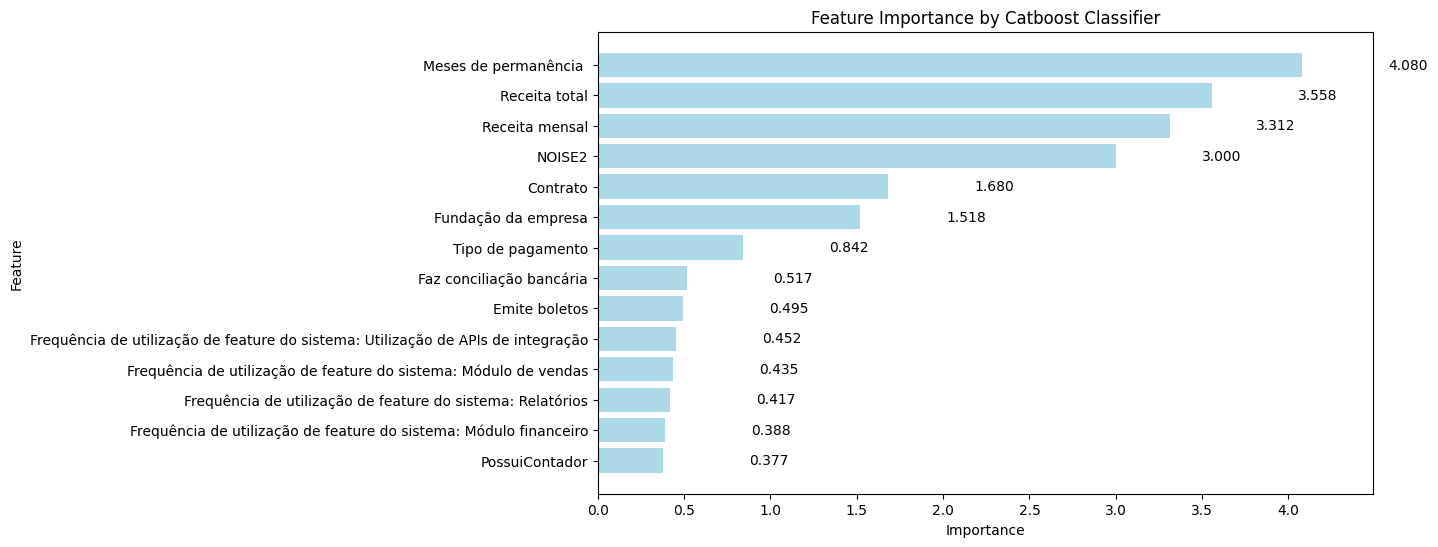

In [134]:
# Plotando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#ADD8E6')

# Adicionando valores acima das barras
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', va='center')

# Configurações do gráfico
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Catboost Classifier')
plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)  # Definindo limites do eixo x

# Mostrando o gráfico
plt.show()

Pode-se ver que ambas as tecnicas de Feature Selection deram resultados iguais para o modelo: 
Receita mensal, Receita total e Meses de permanência. Com isso o modelo segue simples com essas 3 variáveis.

In [135]:
# Função que Salva ou carrega um modelo (ftype = tipo do arquivo, pkl ou joblib)
def work_model(model=None, ftype='pkl', path2save='../../models/', outname='model'):
    '''
    Salva ou carrega um modelo

    inputs:
    model = modelo a ser salvo
    ftype = tipo do arquivo, pkl ou joblib
    path2save = path para salvar/carregar o modelo: ex.: '../../models' 
    outname = nome para o output - nome do modelo

    output:
    retorna = arquivo salvo ou modelo carregado
    '''
    import os
    import joblib
    import pickle
    
    outname = os.path.join(path2save, outname) 
    outfile = f"{outname}.{ftype}" 
    if ftype == 'pkl':
        if model: # save
            pickle.dump(model, open(outfile, 'wb'))
            print(f'Model saved as {outfile}')   
        else: # load
            return pickle.load(open(f'{outfile}', 'rb'))
    else:
        if model:
            joblib.dump(model, outfile)
            print(f'Model saved as {outfile}')   
        else:
            return joblib.load(f'{outfile}')
        
# Parametros
def grid_search(X, y, model=LogisticRegression(), nsplit=3, param_grid={}, average_type='macro', njobs=-1):
    '''
    Executa o grid search
    '''
    kfold = StratifiedKFold(n_splits=nsplit, shuffle=True) 
    cv = kfold.split(X, y) 
    score = make_scorer(f1_score, average=average_type, greater_is_better=True)
    clf = GridSearchCV(model, param_grid, scoring=score, cv=cv, n_jobs=njobs)
    clf.fit(X, y)
    print('F1 score: ', clf.best_score_)
    print('Best parameters: ', clf.best_params_)
    return clf.cv_results_['mean_test_score']

def fit_model(X, y, model=LogisticRegression()):
    '''
    Fit modelos aos dados
    '''
    model.fit(X, y)
    return model

def eval_model(model, X, y, average_type='macro', labels=None, target_names=None):
    '''
    Retorna as metricas básicas de acordo com a predição
    '''
    y_pred = model.predict(X)
    #auc_scores = roc_auc_score(y, model.predict_proba(X))  #multi_class='ovr', average=None)
    class_order = [int(model.classes_[i]) for i in labels]
    #score_order = [auc_scores[n] for n in class_order]
    #aucs = [f'class {x}: {val:.2%}' for x, val in zip(target_names,score_order)]
    print('Report: \n', classification_report(y, y_pred, labels=labels, target_names=target_names))
    print('Accuracy: %.3f' % (accuracy_score(y, y_pred)))
    print('Precision: %.3f' % (precision_score(y, y_pred, average=average_type)))
    print('Recall: %.3f' % (recall_score(y, y_pred, average=average_type)))
    print('F1 score: %.3f' % (f1_score(y, y_pred, average=average_type)))
    #print('AUC scores for each class using One-vs-rest: \n', aucs)

def plot_conf_matrix(model, X_train, X_test, y_test, y_train,
                     eval_mode='ovr',
                     average_type='macro',
                     cmap_='Greens',
                     labels_order=None,
                     target_names=None,
                     tick_marks=None):
    
    y_pred_trainp = model.predict_proba(X_train)
    y_predp = model.predict_proba(X_test)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    roc_test = roc_auc_score(y_test, y_pred)
    print(f'ROC_AUC score test: {roc_test*100:.2f}%')

    
    conf_matrix = confusion_matrix(y_test, y_pred, labels=labels_order)
    print('Confusion matrix for test: \n')
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    annot_ = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
    annot_ = np.asarray(annot_).reshape(conf_matrix.shape)   
    sns.heatmap(conf_matrix, annot=annot_, fmt='', xticklabels=target_names, yticklabels=target_names, cmap=cmap_)

def eval_model_all(model, X, y, X_train, X_test, y_train, y_test, eval_mode='ovr', average_type='macro', cmap_='Greens', labels_order=None, target_names=None, tick_marks=None):
    '''
    Retorna todas as principais metricas levando em consideração dos os dados
    '''

    y_pred_trainp = model.predict_proba(X_train)
    y_predp = model.predict_proba(X_test) 
    y_allp = model.predict_proba(X)

    roc_train = roc_auc_score(y_train, y_pred_trainp) # multi_class=eval_mode)  
    roc_test = roc_auc_score(y_test, y_predp)# multi_class=eval_mode)
    roc_all = roc_auc_score(y, y_allp) #multi_class=eval_mode)
    print(f'ROC_AUC score train: {roc_train*100:.2f}%')
    print(f'ROC_AUC score test: {roc_test*100:.2f}%')
    print(f'ROC_AUC score all: {roc_all*100:.2f}% \n')
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pall = model.predict(X)
    
    print(f'Accuracy for train: {accuracy_score(y_train, y_pred_train)*100:.2f}%')
    print(f'Accuracy for test: {accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Accuracy for all: {accuracy_score(y,y_pall)*100:.2f}% \n')
    
    sen_train = sensitivity_score(y_train, y_pred_train, average=average_type)
    sen_test = sensitivity_score(y_test, y_pred, average=average_type)
    sen_all = sensitivity_score(y, y_pall, average=average_type)
    spe_train = specificity_score(y_train, y_pred_train, average=average_type)
    spe_test = specificity_score(y_test, y_pred, average=average_type)
    spe_all = specificity_score(y, y_pall, average=average_type)
    print(f'Sensitivity for train: {sen_train*100:.2f}%, Specificity for train: {spe_train*100:.2f}')
    print(f'Sensitivity for test: {sen_test*100:.2f}%, Specificity for test: {spe_test*100:.2f}')
    print(f'Sensitivity for all: {sen_all*100:.2f}%, Specificity for all: {spe_all*100:.2f} \n')
                
    conf_matrix = confusion_matrix(y_test, y_pred, labels=labels_order)
    print('Confusion matrix for test: \n')
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    annot_ = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
    annot_ = np.asarray(annot_).reshape(conf_matrix.shape)   
    sns.heatmap(conf_matrix, annot=annot_, fmt='', xticklabels=target_names, yticklabels=target_names, cmap=cmap_)



In [136]:
feature_importance_df = feature_importance_df[-3:]

variaveis_selecionadas = list(feature_importance_df.Feature) 
variaveis_selecionadas

['Receita mensal', 'Receita total', 'Meses de permanência ']

In [137]:
# ajustando o df do modelo
df_rfe = df_norm[variaveis_selecionadas]
df_rfe['Churn'] = df_norm['Churn']
df_rfe

,Receita mensal,Receita total,Meses de permanência,Churn
0,0.115423,0.003437,0.013889,0
1,0.385075,0.217564,0.472222,0
2,0.354229,0.012453,0.027778,1
3,0.239303,0.211951,0.625000,0
4,0.521891,0.017462,0.027778,1
...,...,...,...,...
7038,0.662189,0.229194,0.333333,0
7039,0.845274,0.847792,1.000000,0
7040,0.112935,0.039892,0.152778,0
7041,0.558706,0.035303,0.055556,1


In [138]:
#separar a base de validação 

df_validation = shap.sample(df_rfe, nsamples= int(df_rfe.shape[0]* 0.20))
X_val = df_validation.drop('Churn', axis = 1)
y_val = df_validation['Churn']

#retirar os dados da validação da base principal

df_rfe = df_rfe.drop(df_validation.index)
df_rfe

,Receita mensal,Receita total,Meses de permanência,Churn
0,0.115423,0.003437,0.013889,0
2,0.354229,0.012453,0.027778,1
3,0.239303,0.211951,0.625000,0
4,0.521891,0.017462,0.027778,1
5,0.809950,0.094475,0.111111,1
...,...,...,...,...
7035,0.601493,0.172151,0.263889,0
7036,0.421891,0.085586,0.166667,0
7037,0.028856,0.163435,1.000000,0
7038,0.662189,0.229194,0.333333,0


<AxesSubplot: title={'center': 'Test sample'}, ylabel='count'>

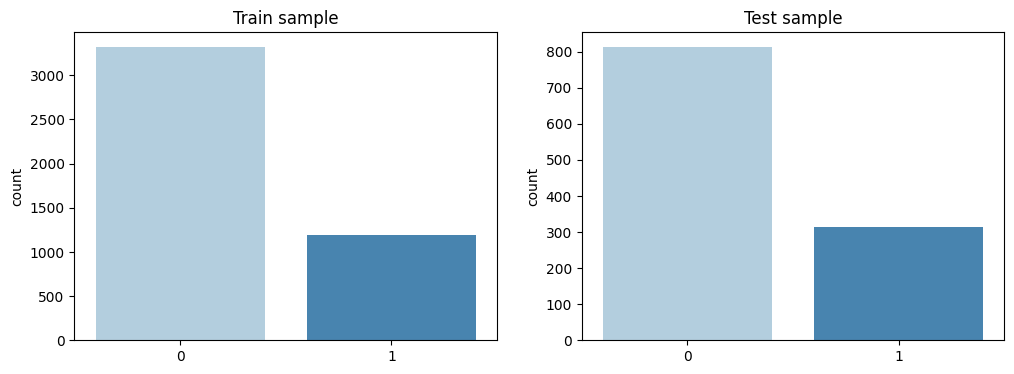

In [139]:
# Separa as features
cols2exc = []
target = ['Churn']

X = df_rfe.drop(cols2exc + target, axis=1) # features
y = df_rfe[target[0]].values # target

# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# check da distribuição dos targets
fig, axs = plt.subplots(1,2, figsize=[12,4])
axs[0].title.set_text("Train sample")
sns.countplot(x=y_train, ax=axs[0], palette='Blues')
axs[1].title.set_text("Test sample")
sns.countplot(x=y_test, ax=axs[1], palette='Blues')

In [140]:
class_validation = pd.DataFrame(pd.DataFrame(y_train).value_counts(normalize = True).mul(100).round(2))
class_validation # verifica a proporcao das classes 

,proportion
0,
0,73.67
1,26.33


As classes do modelo estão bem desbalanceadas. 


In [141]:
# balanceando as classes para testar resultados
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_train_bl, y_train_bl = rus.fit_resample(X_train, y_train)

<AxesSubplot: title={'center': 'Test sample'}, ylabel='count'>

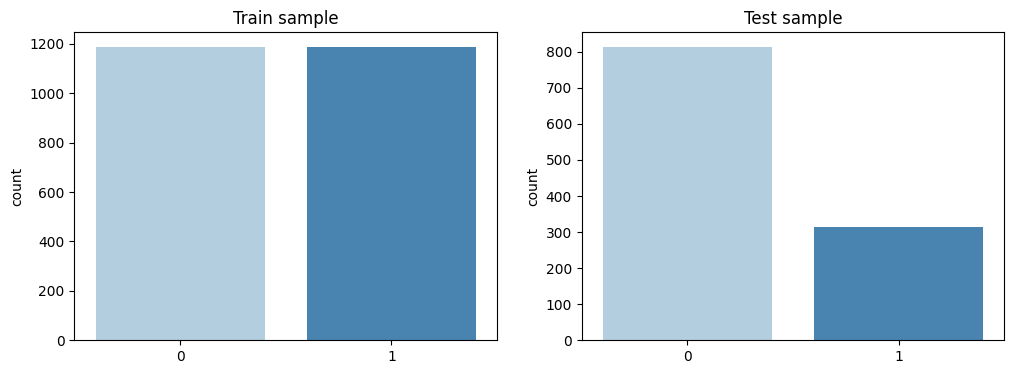

In [142]:
# check da distribuição dos targets
fig, axs = plt.subplots(1,2, figsize=[12,4])
axs[0].title.set_text("Train sample")
sns.countplot(x=y_train_bl, ax=axs[0], palette='Blues')
axs[1].title.set_text("Test sample")
sns.countplot(x=y_test, ax=axs[1], palette='Blues')

In [143]:
class_validation = pd.DataFrame(pd.DataFrame(y_train_bl).value_counts(normalize = True).mul(100).round(2))
class_validation # verifica a proporcao das classes entre sim (1) ou nao (0)

,proportion
0,
0,50.0
1,50.0


In [144]:
# otimizando com Optuna
def objective(trial):
    # Definição do espaço de busca para os hiperparâmetros
    param_dist = {
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 50),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    }

    # Instância do classificador com os hiperparâmetros sugeridos
    clf = XGBClassifier(random_state=42, n_jobs=-1, **param_dist)

    # Avaliação do desempenho do modelo usando validação cruzada
    score = cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1).mean()

    return -score  # Objetivo é minimizar o erro, por isso usamos o negativo do score

# Criando um estudo Optuna
study = optuna.create_study(direction='maximize')  # 'maximize' para maximizar o score

# Otimização de hiperparâmetros
study.optimize(objective, n_trials=50)  # Ajuste o número de trials conforme necessário

# Melhores hiperparâmetros
best_params = study.best_params

print("Melhores hiperparâmetros:", best_params)

[I 2023-10-01 21:00:39,385] A new study created in memory with name: no-name-5526d864-4b52-43a9-89ce-a3c489ba510d
[I 2023-10-01 21:00:39,889] Trial 0 finished with value: -0.7506682152782761 and parameters: {'max_features': 'log2', 'max_depth': 18, 'min_samples_split': 32, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss'}. Best is trial 0 with value: -0.7506682152782761.
[I 2023-10-01 21:00:40,119] Trial 1 finished with value: -0.7704103554985013 and parameters: {'max_features': 'log2', 'max_depth': 7, 'min_samples_split': 43, 'class_weight': 'balanced_subsample', 'criterion': 'gini'}. Best is trial 0 with value: -0.7506682152782761.
[I 2023-10-01 21:00:41,050] Trial 2 finished with value: -0.7462313130803048 and parameters: {'max_features': 'sqrt', 'max_depth': 48, 'min_samples_split': 25, 'class_weight': None, 'criterion': 'entropy'}. Best is trial 2 with value: -0.7462313130803048.
[I 2023-10-01 21:00:41,977] Trial 3 finished with value: -0.7495582883648297 and paramete

Melhores hiperparâmetros: {'max_features': 'sqrt', 'max_depth': 49, 'min_samples_split': 18, 'class_weight': None, 'criterion': 'entropy'}


In [196]:
# fit modelo imbalanced
rfc_params = study.best_params
rfc_params['n_jobs'] = -1
rfc_params['random_state'] = 13 

rfc = fit_model(X_train, y_train, model=XGBClassifier(**rfc_params))

y_pred = rfc.predict(X_test)

eval_model(rfc, X_test, y_test, labels=[0,1], target_names=['No Churn','Churn'])

[22:04:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight", "criterion", "max_features", "min_samples_split" } are not used.

Report: 
               precision    recall  f1-score   support

    No Churn       0.81      0.87      0.84       813
       Churn       0.58      0.46      0.51       314

    accuracy                           0.76      1127
   macro avg       0.69      0.66      0.67      1127
weighted avg       0.74      0.76      0.75      1127

Accuracy: 0.757
Precision: 0.694
Recall: 0.664
F1 score: 0.674


In [187]:
# otimizando com Optuna
def objective(trial):
    # Definição do espaço de busca para os hiperparâmetros
    param_dist = {
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 50),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    }

    # Instância do classificador com os hiperparâmetros sugeridos
    clf = XGBClassifier(random_state=42, n_jobs=-1, **param_dist)

    # Avaliação do desempenho do modelo usando validação cruzada
    score = cross_val_score(clf, X_train_bl, y_train_bl, cv=3, n_jobs=-1).mean()

    return -score  # Objetivo é minimizar o erro, por isso usamos o negativo do score

# Criando um estudo Optuna
study = optuna.create_study(direction='maximize')  # 'maximize' para maximizar o score

# Otimização de hiperparâmetros
study.optimize(objective, n_trials=50)  # Ajuste o número de trials conforme necessário

# Melhores hiperparâmetros
best_params_2 = study.best_params

print("Melhores hiperparâmetros:", best_params_2)

[I 2023-10-01 21:33:25,372] A new study created in memory with name: no-name-a9f3ea16-d835-4988-9678-8465844e7ed0
[I 2023-10-01 21:33:25,717] Trial 0 finished with value: -0.6798702362861655 and parameters: {'max_features': 'sqrt', 'max_depth': 22, 'min_samples_split': 5, 'class_weight': 'balanced_subsample', 'criterion': 'gini'}. Best is trial 0 with value: -0.6798702362861655.
[I 2023-10-01 21:33:26,085] Trial 1 finished with value: -0.6798702362861655 and parameters: {'max_features': 'sqrt', 'max_depth': 27, 'min_samples_split': 44, 'class_weight': 'balanced', 'criterion': 'entropy'}. Best is trial 0 with value: -0.6798702362861655.
[I 2023-10-01 21:33:26,461] Trial 2 finished with value: -0.6802905796268628 and parameters: {'max_features': 'log2', 'max_depth': 50, 'min_samples_split': 17, 'class_weight': None, 'criterion': 'gini'}. Best is trial 0 with value: -0.6798702362861655.
[I 2023-10-01 21:33:26,877] Trial 3 finished with value: -0.6828179604728278 and parameters: {'max_feat

Melhores hiperparâmetros: {'max_features': 'sqrt', 'max_depth': 32, 'min_samples_split': 38, 'class_weight': 'balanced_subsample', 'criterion': 'gini'}


In [189]:
# fit modelo balanced
rfc_params = study.best_params
rfc_params['n_jobs'] = -1
rfc_params['random_state'] = 13 

rfc_bl = fit_model(X_train_bl, y_train_bl, model=XGBClassifier(**rfc_params))

y_pred = rfc_bl.predict(X_test)

eval_model(rfc_bl, X_test, y_test, labels=[0,1], target_names=['No Churn','Churn'])

[21:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight", "criterion", "max_features", "min_samples_split" } are not used.

Report: 
               precision    recall  f1-score   support

    No Churn       0.85      0.68      0.76       813
       Churn       0.46      0.69      0.55       314

    accuracy                           0.68      1127
   macro avg       0.65      0.69      0.65      1127
weighted avg       0.74      0.68      0.70      1127

Accuracy: 0.684
Precision: 0.653
Recall: 0.685
F1 score: 0.653


#### 4. Conclusão dos modelos e Experimentos

Modelo desbalanceado:

Precision (Precisão): A precisão é a proporção de verdadeiros positivos (casos previstos como "Churn" que são realmente "Churn") em relação a todos os casos previstos como "Churn". No modelo desbalanceado, a precisão para a classe "Churn" é de 0,694, o que significa que cerca de 69,4% das previsões de "Churn" estão corretas. 

Recall: O recall é a proporção de verdadeiros positivos em relação a todos os casos reais de "Churn". No seu modelo desbalanceado o recall para a classe "Churn" é de 0,661, o que significa que o modelo captura cerca de 66,1% de todos os casos reais de "Churn". Isso indica que o modelo está perdendo alguns casos de "Churn" (falsos negativos).

F1-Score: O F1-score combina precisão e recall. Ele fornece uma medida geral do desempenho do modelo, levando em consideração tanto os falsos positivos quanto os falsos negativos. O F1-score para a classe "Churn" é de 0,672, o que indica um equilíbrio razoável entre precisão e recall.

Acurácia: essa metricas mede a proporção de previsões corretas em relação a todas as previsões. A acurácia geral do seu modelo é de 0,757, o que significa que cerca de 75,7% de todas as previsões estão corretas. No entanto, a acurácia pode ser enganosa em cenários de desequilíbrio de classes, onde a classe majoritária ("No Churn") domina a métrica.

Desequilíbrio de Classes: É importante observar que o desequilíbrio de classes afeta significativamente o desempenho do modelo. O F1-score, em particular, mostra que o modelo está tendendo a ser mais preciso, mas está perdendo alguns casos de "Churn". Isso pode ser devido ao fato de que o modelo está sendo tendencioso em direção à classe majoritária.

Os resultados indicam que o modelo tem um desempenho razoável, mas ainda há espaço para melhorias, especialmente na detecção de casos de "Churn" e na redução de falsos positivos. 


Modelo balanceado:

Precision: A precisão para a classe "Churn" melhorou em relação ao modelo anterior, atingindo 0,653. Isso indica que o modelo está prevendo com mais precisão os casos de "Churn". No entanto, a precisão para a classe "No Churn" diminuiu para 0,85, o que significa que o modelo está gerando mais falsos positivos para essa classe.

Recall: o recall para a classe "Churn" também melhorou, atingindo 0,685. Isso significa que o modelo está capturando uma proporção maior dos casos reais de "Churn". No entanto, a revocação para a classe "No Churn" diminuiu para 0,68, o que indica que o modelo está gerando mais falsos negativos para essa classe.

F1-Score: O F1-score para a classe "Churn" permaneceu em 0,653, o que indica um equilíbrio entre precisão e revocação para essa classe. No geral, o F1-score ponderado para todas as classes é de 0,70, mostrando um desempenho geral razoável.

Acurácia: A acurácia geral do modelo é de 0,684, o que indica que cerca de 68,4% de todas as previsões estão corretas. Embora a acurácia tenha diminuído em relação ao modelo desbalanceado, isso é esperado devido ao equilíbrio das classes.

Desequilíbrio de Classes: O balanceamento das classes melhorou o desempenho do modelo em relação ao reconhecimento de casos de "Churn". No entanto, o modelo ainda gera alguns falsos positivos para a classe "No Churn" e falsos negativos para a classe "Churn". 

O modelo com as classes balanceadas foi uma tentativa de melhorar as métricas. Considero que um falso negativo de churn pode ser mais custoso do que um falso positivo

O modelo balanceado apresenta melhorias em relação ao modelo desbalanceado na detecção de casos de "Churn". No entanto, ainda há espaço para melhorias, especialmente na redução de falsos positivos e falsos negativos. Consideraria ficar com o modelo balanceado para trabalhar estratégias para a área. 

Para melhorar o desempenho do modelo, adotaria as seguintes estratégias:

Aumento de Dados: O modelo se beneficiaria de um conjunto de dados mais amplo. Coletar mais exemplos de clientes, especialmente aqueles que tiveram experiências de "Churn" ou não, fornecerá uma base de treinamento mais robusta.

Experimentação com Algoritmos: Além do algoritmo atual, seria útil explorar outros algoritmos de classificação. Testar diferentes modelos pode revelar qual deles se adapta melhor aos dados e produz resultados mais precisos.

Probabilidades Calibradas: Adicionar uma coluna com probabilidades calibradas para cada classe pode melhorar a confiabilidade das previsões do modelo. Isso pode ser realizado usando técnicas como a calibração de Platt ou a calibração isotônica.

Dados Adicionais: Incorporar mais informações sobre os clientes, como informações de pagamento, datas mais detalhadas e características categóricas adicionais, pode enriquecer o conjunto de dados e melhorar a capacidade do modelo de fazer previsões precisas.

MaisFeature Engineering com mais dados: Realizar uma engenharia de recursos mais robusta pode revelar insights ocultos nos dados. Criar novas variáveis que capturem o comportamento do cliente de maneira mais detalhada pode melhorar a capacidade de previsão do modelo.

Variáveis Exógenas Econômicas: Incorporar variáveis exógenas, como taxas de juros ou indicadores econômicos, pode ajudar a entender como fatores econômicos afetam as decisões de "Churn" das pequenas empresas. Isso pode levar a insights valiosos sobre o impacto de variáveis externas nas decisões financeiras dos clientes.

Aprimorar o modelo de previsão de "Churn" requer uma abordagem abrangente que envolva a expansão do conjunto de dados, a exploração de diferentes algoritmos, a inclusão de informações adicionais e a criação de recursos mais sofisticados. Essas medidas podem aumentar a precisão e a capacidade de generalização do modelo, permitindo uma melhor compreensão do comportamento dos clientes e auxiliando nas estratégias de retenção.

<h5> <strong>Primeiro experimento</strong></h5>

Para trabalhar uma estrategia para diminuir esses clientes que optam pelo distrato do contrato com a Conta Azul, considero algumas alternativas:

- Trabalhar com maior foco nos clientes que estão no contrato mensal, onde a quantidade de churn é muito alta, trabalhando ativamente no CS, mapeando os motivos desse distrato. Seria falta de instrução para mexer no software? Seria o software muito complicado para o pequeno empreendedor? 
Ao analisar a frequencia de uso das features, podemos ver que existe um grupo de 1526 pessoas que nunca utilizou as features. Também temos um grupo coeso de pessoas que faz pouco uso dessas features. Um plano para engajar o usuário no uso do software, tornando o usuário mais dependente e assim, mais inclinado a renovar o contrato. 
- Descontos focados em fidelização. Trazer mais opções de períodos de contrato, como por exemplo, seis mesescom desconto progressivo, verificar boas práticas períodos para ligar para os clientes e procurar entender a razao dele nao estar utilizando determinados recursos presentes no sistema, eventos que falem sobre os benefícios da boa utilização do sistema como um todo.
- Trabalhar com benchmarks. Uma relação mais próxima desses clientes com maior probabilidade de churn, utilizando a base trabalhada pelo modelo.
- Targets: empresas com contratos mais vulneráveis (menos de 1 ano, mes a mes), com baixa utilizaçao das features do sistema.



In [200]:
df['Frequência de utilização de feature do sistema: Módulo financeiro'].value_counts()

Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         3498
Uso frequente     2019
Nunca utilizou    1526
Name: count, dtype: int64

In [203]:
df['Frequência de utilização de feature do sistema: Emissão de nota fiscal'].value_counts()

Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         3088
Uso frequente     2429
Nunca utilizou    1526
Name: count, dtype: int64

In [205]:
df['Frequência de utilização de feature do sistema: Integração bancária'].value_counts()

Frequência de utilização de feature do sistema: Integração bancária
Pouco uso         3095
Uso frequente     2422
Nunca utilizou    1526
Name: count, dtype: int64

In [207]:
df['Frequência de utilização de feature do sistema: Módulo de vendas'].value_counts()

Frequência de utilização de feature do sistema: Módulo de vendas
Pouco uso         3473
Uso frequente     2044
Nunca utilizou    1526
Name: count, dtype: int64

In [208]:
df['Frequência de utilização de feature do sistema: Relatórios'].value_counts()

Frequência de utilização de feature do sistema: Relatórios
Pouco uso         2810
Uso frequente     2707
Nunca utilizou    1526
Name: count, dtype: int64

In [209]:
df['Frequência de utilização de feature do sistema: Utilização de APIs de integração'].value_counts()

Frequência de utilização de feature do sistema: Utilização de APIs de integração
Pouco uso         2785
Uso frequente     2732
Nunca utilizou    1526
Name: count, dtype: int64

<h5> <strong>Segundo experimento</strong></h5>

Considerando um modelo produtizado com as seguintes features: 
- Alerta churn a partir da probabilidade 60% positiva;
- conjunto de features menos utilizadas e que seriam mais importantes para aquele grupo de clientes afim de atacar o enganajemnto no software
- uma lista com essas informações diariamente no email do time de CS

Para o segundo experimento, essas seriam as principais ações para fidelizar os clientes e evitar o distrato:

- Programas de Fidelidade e Recompensas:
Desenvolver programas de fidelidade que reconheçam e recompensem a lealdade dos clientes é uma estratégia eficaz para evitar o churn. Esses programas podem ser projetados de maneira a oferecer benefícios exclusivos, como descontos especiais, acúmulo de pontos de recompensa ou ofertas personalizadas para clientes que permaneçam fiéis à empresa ao longo do tempo.
Além disso, é possível adotar uma abordagem personalizada, levando em consideração o histórico de contratação e as preferências individuais de cada cliente. Como uma empresa de software como serviço (SaaS), uma ideia interessante seria a implementação de um sistema de créditos, como as "Azul Coins", moedas exclusivas da conta Azul. Os clientes poderiam acumular esses créditos por meio do uso do sistema, fornecendo feedback ou realizando ações específicas. Essa abordagem personalizada incentivaria os clientes a continuar utilizando o serviço e a se envolver ativamente, fortalecendo ainda mais a relação deles com a empresa.
Essas estratégias não apenas incentivam a lealdade do cliente, mas também criam um ambiente de recompensas e reconhecimento que pode aumentar o engajamento e a satisfação, reduzindo assim as taxas de churn.
- Atendimento ao Cliente de Qualidade:
Investir em um atendimento ao cliente excepcional. Clientes satisfeitos tendem a permanecer fiéis à marca.
Responder prontamente às consultas e problemas dos clientes, resolver reclamações de maneira eficaz e garantir que os clientes se sintam valorizados e ouvidos. Dividir o time de CS onde uma parte cuida dos clientes já fidelizados afim de mantê-los fiéis ao software e os clientes com maior probabilidade de churn, como os clientes do contrato mes a mes. Trabalhar de forma diferenciada com esses clientes pode trazer bons resultados.
- Engajamento e Comunicação Constante:
Manter um forte engajamento com os clientes por meio de comunicações regulares. Isso pode incluir newsletters informativas, atualizações de produtos ou serviços e conteúdo relevante. Usar canais de comunicação eficazes, como e-mail, mídia social e aplicativos móveis, para manter os clientes informados e envolvidos.